# 1. Install Dependencies and Setup

In [112]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [113]:
!pip list

Package                         Version
------------------------------- --------------------
absl-py                         1.2.0
aiohttp                         3.8.1
aiosignal                       1.2.0
alabaster                       0.7.12
albumentations                  1.3.0
anaconda-client                 1.9.0
anaconda-navigator              2.2.0
anaconda-project                0.10.2
anyio                           3.5.0
appdirs                         1.4.4
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.2
astroid                         2.6.6
astropy                         5.0.4
asttokens                       2.0.5
astunparse                      1.6.3
async-timeout                   4.0.1
atomicwrites                    1.4.0
attrs                           21.4.0
Automat                         20.2.0
autopep8                        1.6.0
Babel                           2.9.1
backcall                   


botocore                        1.24.32
Bottleneck                      1.3.4
brotlipy                        0.7.0
cachetools                      4.2.2
certifi                         2021.10.8
cffi                            1.15.0
chardet                         4.0.0
charset-normalizer              2.0.4
click                           8.0.4
cloudpickle                     2.0.0
clyent                          1.2.2
colorama                        0.4.4
colorcet                        2.0.6
commonmark                      0.9.1
comtypes                        1.1.10
conda                           4.14.0
conda-build                     3.21.8
conda-content-trust             0+unknown
conda-pack                      0.6.0
conda-package-handling          1.8.1
conda-repo-cli                  1.0.4
conda-token                     0.3.0
conda-verify                    3.4.2
constantly                      15.1.0
contextlib2                     21.6.0
cookiecutter                    1

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove unuseful images

In [4]:
import cv2
import imghdr # check file extension

In [5]:
data_dir = 'data' 

In [6]:
os.listdir(data_dir)

['d.jpeg', 'normal', 'pneumonia']

In [7]:
os.listdir(os.path.join(data_dir, 'normal'))

['.ipynb_checkpoints',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
image_exts 

['jpeg', 'jpg', 'bmp', 'png']

In [10]:
img = cv2.imread(os.path.join('data', 'normal', 'IM-0207-0001.jpeg'))

img.shape

(1049, 1426, 3)

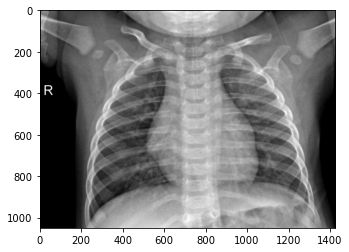

In [11]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
print('Image not in ext list {}'.format(3))

Image not in ext list 3


In [13]:
# removing duggy images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)  # read image
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)  #remove duggy
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'data\\d.jpeg'

# 3. Load Data

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory??
# data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 8)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [20]:
data = tf.keras.utils.image_dataset_from_directory('data') 
# to use keras API, that build image dataset for you and you do not nees to label data or clases
# build a data pipeline

Found 5230 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator() # you cannot access data array and you must change it to numppy
# allow access data pipeline

In [22]:
batch = data_iterator.next()

In [23]:
# images represent as numpy array
batch[0]

array([[[[63.10547   , 63.10547   , 63.10547   ],
         [65.92969   , 65.92969   , 65.92969   ],
         [66.18359   , 66.18359   , 66.18359   ],
         ...,
         [68.140625  , 68.140625  , 68.140625  ],
         [68.44531   , 68.44531   , 68.44531   ],
         [65.171875  , 65.171875  , 65.171875  ]],

        [[74.53125   , 74.53125   , 74.53125   ],
         [76.84375   , 76.84375   , 76.84375   ],
         [75.671875  , 75.671875  , 75.671875  ],
         ...,
         [75.09375   , 75.09375   , 75.09375   ],
         [75.015625  , 75.015625  , 75.015625  ],
         [71.72266   , 71.72266   , 71.72266   ]],

        [[81.953125  , 81.953125  , 81.953125  ],
         [81.83203   , 81.83203   , 81.83203   ],
         [83.83594   , 83.83594   , 83.83594   ],
         ...,
         [83.90625   , 83.90625   , 83.90625   ],
         [79.89453   , 79.89453   , 79.89453   ],
         [81.953125  , 81.953125  , 81.953125  ]],

        ...,

        [[33.25      , 33.25      , 33

In [24]:
# labels represent as numpy array
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [25]:
len(batch) # one for images and another for label

2

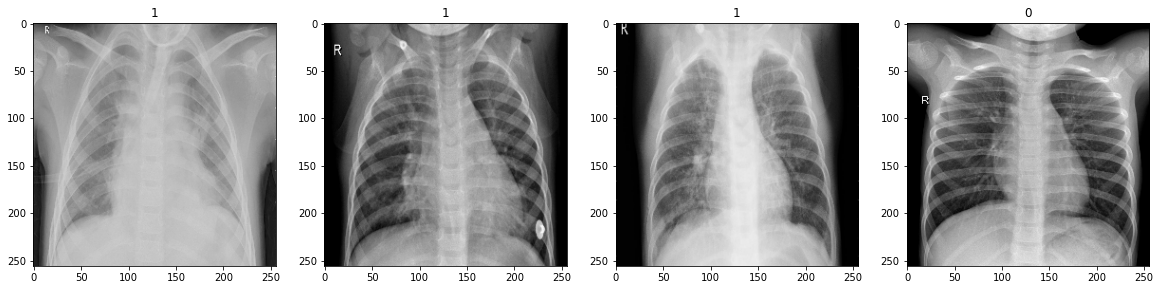

In [26]:
# to check which groupe assigned with which number  .astype(int)
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #subplot to plot four image at the same time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [27]:
# in tf.data you can find a lot of process that you can do on the function using pipline API. like map, shuffle
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[3.21501851e-01, 3.21501851e-01, 3.21501851e-01],
          [3.31188738e-01, 3.31188738e-01, 3.31188738e-01],
          [3.62839997e-01, 3.62839997e-01, 3.62839997e-01],
          ...,
          [2.01593135e-02, 2.01593135e-02, 2.01593135e-02],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[3.33455890e-01, 3.33455890e-01, 3.33455890e-01],
          [3.44730407e-01, 3.44730407e-01, 3.44730407e-01],
          [3.68054688e-01, 3.68054688e-01, 3.68054688e-01],
          ...,
          [3.85730225e-03, 3.85730225e-03, 3.85730225e-03],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[3.23112816e-01, 3.23112816e-01, 3.23112816e-01],
          [3.30557674e-01, 3.30557674e-01, 3.30557674e-01],
          [3.47334802e-01, 3.47334802e-01, 3.47334802e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [29]:
data.as_numpy_iterator().next()[0].max() 


1.0

# 5. Split Data

In [30]:
len(data)

164

In [31]:
train_size = int(len(data)*.7) + 2
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:
train_size + val_size + test_size

164

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#  Build Deep Learning Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='softmax', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='softmax'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='softmax'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
116/116 [==============================] - 113s 968ms/step - loss: 0.5763 - accuracy: 0.7400 - val_loss: 0.5802 - val_accuracy: 0.7344
Epoch 2/4
116/116 [==============================] - 109s 933ms/step - loss: 0.5733 - accuracy: 0.7414 - val_loss: 0.5774 - val_accuracy: 0.7363
Epoch 3/4
116/116 [==============================] - 487s 4s/step - loss: 0.5720 - accuracy: 0.7416 - val_loss: 0.5789 - val_accuracy: 0.7344
Epoch 4/4
116/116 [==============================] - 120s 1s/step - loss: 0.5714 - accuracy: 0.7419 - val_loss: 0.5660 - val_accuracy: 0.7471


# 8. Plot Performance

In [43]:
hist.history

{'loss': [0.5763466358184814,
  0.5732515454292297,
  0.5720386505126953,
  0.5713703632354736],
 'accuracy': [0.7400323152542114,
  0.7413793206214905,
  0.7416487336158752,
  0.7419180870056152],
 'val_loss': [0.5802431106567383,
  0.5773977637290955,
  0.5789360404014587,
  0.5659735798835754],
 'val_accuracy': [0.734375, 0.736328125, 0.734375, 0.7470703125]}

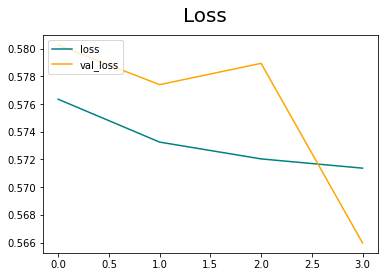

In [44]:
#plot the performance of training
# Divergance means overfitting
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

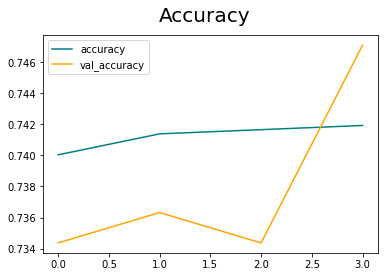

In [45]:
#plot the performance of training
# Divergance means overfitting
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 189ms/step


In [49]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.72672063>

In [50]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.7267206311225891, Recall:1.0, Accuracy:0.7267206311225891


# 10. Test

In [51]:
import cv2

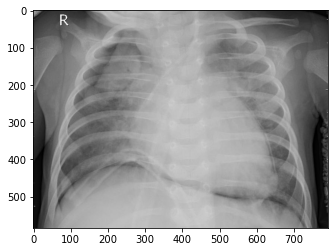

In [52]:
img = cv2.imread('person59_bacteria_281.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

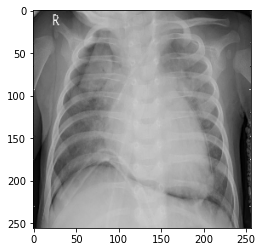

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize.shape

TensorShape([256, 256, 3])

In [55]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [56]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0)) #import a batch of images because network is expected

1/1 [==============================] - 0s 36ms/step


In [57]:
yhat

array([[0.7339931]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is pneumonia')
else:
    print(f'Predicted class is normal')

Predicted class is pneumonia


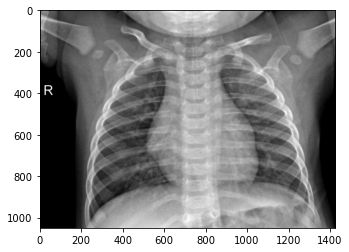

In [59]:
img = cv2.imread('IM-0207-0001.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


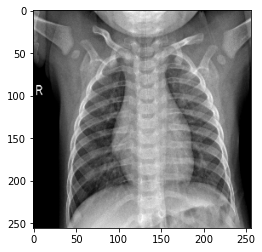

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
resize.shape

TensorShape([256, 256, 3])

In [62]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [63]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0)) #import a batch of images because network is expected

1/1 [==============================] - 0s 45ms/step


In [64]:
yhat

array([[0.7339931]], dtype=float32)

In [65]:
if yhat > 0.5: 
    print(f'Predicted class is pneumonia')
else:
    print(f'Predicted class is normal')

Predicted class is pneumonia


In [66]:

def classify_image(img):
    img_new = tf.image.resize(img, (256,256))
    prediction = model.predict(np.expand_dims(img_new/255, 0))
    if prediction > 0.5: 
        text = f'Predicted class is pneumonia'
    else:
        text = f'Predicted class is normal'
    return text
    
import gradio as gr    
gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs='text').launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://fd5be2e7d3dcda21.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://www.huggingface.co/spaces


(<gradio.routes.App at 0x2adb594fe20>,
 'http://127.0.0.1:7861/',
 'https://fd5be2e7d3dcda21.gradio.app')

# 11. Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','imageclassifierForlungprojectDAniyalSojoudi.h5'))

In [69]:
new_model = load_model(os.path.join('models','imageclassifierForHappyandSadDAniyal.h5'))

In [70]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [71]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 134ms/step


array([[0.9859793]], dtype=float32)